## Caution, basemap is at end-of-life. You should use cartopy for plotting maps with projections

### WeatherGod commented on Aug 9, 2017
I declared the EoL for Basemap last year on the webpage: https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement

I encourage everyone to move to Cartopy because it is a superior API design. I have also advertised this for the past two SciPy conferences. Basemap just has no hope of being maintained.

I should point out that you will soon be getting some competition from the GMT project as they move into the python space, but they don't integrate at all with matplotlib, and there isn't any hope for interactive plotting at the moment. But, their figures are very pretty...

@WeatherGod (Benjamin Root)


### WeatherGod commented on Aug 9, 2017
Side note: I am the sole remaining "Basemap folks". I am just making sure the lights are turned off before I leave.

@WeatherGod (Benjamin Root)

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
#from mpl_toolkits.basemap import Basemap as bm
from eofs.standard import Eof
%matplotlib inline

import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

### Define function to plot our 2D map

In [2]:
def plot_field(subp, X, lat, lon, vmin, vmax, step, cmap=plt.get_cmap('jet'),title=False, grid=False):
    proj = ccrs.PlateCarree(central_longitude=180)
    trans = ccrs.PlateCarree()
    ax = plt.subplot(subp, projection=proj)
    im = ax.contourf(lons, lats, X, np.arange(vmin, vmax+step, step),
        transform=trans,cmap=cmap, extend='max')
    cb = plt.colorbar(im, orientation='horizontal', shrink = 0.75, pad=0.15)
    if grid: 
        ax.coastlines(linewidth=1.5)
        ax.set_xticks(np.arange(140, 300, 40), crs=trans)
        ax.set_yticks(np.arange(-30,40,10), crs=trans)
        lon_formatter = LongitudeFormatter(zero_direction_label=True)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.gridlines(xlocs=np.arange(100, 340, 40),ylocs = np.arange(-40,60,20))
    if title: 
        ax.set_title(title,fontsize=16)

def plot_line(subp, X, time ,title=False):
    plt.subplot(subp)
    ax = plt.plot(time, X)
    if title: 
        plt.title(title, fontsize=16)

## load the EOFs using xarray

In [3]:
ds = xr.open_dataset('python_EOF.nc')
ds

<xarray.Dataset>
Dimensions:  (T: 57, X: 86, Y: 41, ev: 4)
Coordinates:
  * T        (T) datetime64[ns] 1958-01-01 1959-01-01 1960-01-01 1961-01-01 ...
  * X        (X) float32 120.0 122.0 124.0 126.0 128.0 130.0 132.0 134.0 ...
  * Y        (Y) float32 -40.0 -38.0 -36.0 -34.0 -32.0 -30.0 -28.0 -26.0 ...
  * ev       (ev) int64 0 1 2 3
Data variables:
    anom     (T, Y, X) float32 ...
    wgts     (Y, X) float32 ...
    Ss       (ev, Y, X) float32 ...
    Ts       (ev, T) float32 ...

### plots 

In [4]:
lons, lats = np.meshgrid(ds.X, ds.Y)
ds

<xarray.Dataset>
Dimensions:  (T: 57, X: 86, Y: 41, ev: 4)
Coordinates:
  * T        (T) datetime64[ns] 1958-01-01 1959-01-01 1960-01-01 1961-01-01 ...
  * X        (X) float32 120.0 122.0 124.0 126.0 128.0 130.0 132.0 134.0 ...
  * Y        (Y) float32 -40.0 -38.0 -36.0 -34.0 -32.0 -30.0 -28.0 -26.0 ...
  * ev       (ev) int64 0 1 2 3
Data variables:
    anom     (T, Y, X) float32 ...
    wgts     (Y, X) float32 ...
    Ss       (ev, Y, X) float32 ...
    Ts       (ev, T) float32 ...

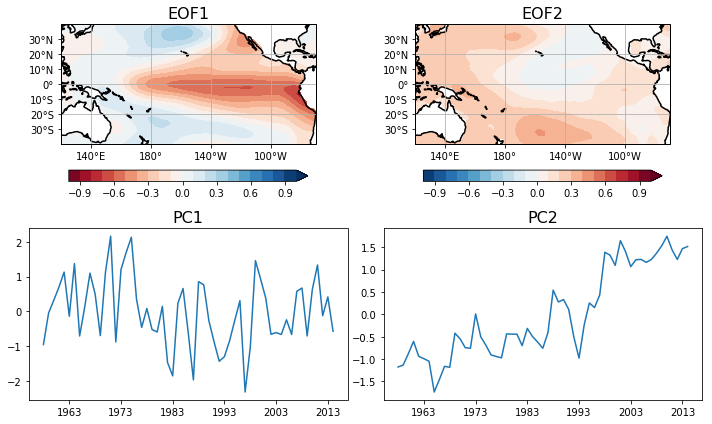

In [5]:
plt.figure(figsize=(10, 6))
plot_field(221, ds.Ss[0].squeeze(), lats, lons, -1, 1, 0.1, cmap='RdBu', title='EOF1', grid=True)
plot_field(222, ds.Ss[1].squeeze(), lats, lons, -1, 1, 0.1, cmap='RdBu_r', title='EOF2', grid=True)
plot_line(223, ds.Ts[0], ds['T'], title = 'PC1') 
plot_line(224, ds.Ts[1], ds['T'], title = 'PC2')
plt.tight_layout()
plt.savefig('plot.eps')